# Halo shapes by meausuring the Shape tensor

The eigenvectors of the tensor give the direction of the princial axis, this is, 
the coordinates of the princial axis.

The eigen values are proportional to the length of the princial axis

In [1]:
%pylab inline
#%matplotlib notebook
#matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import jellyfish
import matplotlib.pyplot as plt
import pygadgetreader 

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/lib/python3.5/dist-packages/Jellyfish-0.1.0-py3.5.egg/jellyfish/orbit.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    a

In [2]:
pos = jellyfish.Hello_sim('../../MW_anisotropy/code/test_snaps/', 'MWLMC3_100M_new_b0_090', 100000000, 0, 'host_dm', 'com_host', 'pos')

In [3]:
halo = jellyfish.Hello_sim('./', 'test_snap', 1000000, 0, 'host_dm', 'com_host', 'pos')

In [4]:
pos = halo.read_MW_snap_com_coordinates()

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions


In [5]:
I = jellyfish.shapes.shape_tensor(pos)

In [6]:
ar = jellyfish.shapes.axis_ratios(I)

In [7]:
ar

(array([[-0.9776348 ,  0.21025156, -0.00494853],
        [ 0.12124271,  0.54422018, -0.83013529],
        [ 0.17184415,  0.81216912,  0.55754005]]),
 array([2.61254344e+24+0.j, 2.84771266e+24+0.j, 2.74612864e+24+0.j]))

In [8]:
def ellipe_plot(r0, axis, plane):
    x0=r0[0]  #x-position of the center
    y0=r0[1]  #y-position of the center
    z0=r0[2]
    a=axis[0]     #radius on the x-axis
    b=axis[1]    #radius on the y-axis
    c=axis[2]
    
    if plane == 'xy':
        u = np.linspace(0, 2*np.pi, 100)
        v = np.ones(100)*np.pi/2.
    elif plane == 'xz':
        u1 = np.ones(50)*(np.pi/2)
        u2 = np.ones(50)*(-np.pi/2)
        u = concatenate((u1, u2))
        v = np.linspace(0, pi, 100)
    elif plane == 'yz':
        u1 = np.zeros(50)
        u2 = np.ones(50)*(-np.pi)
        u = concatenate((u1, u2))
        v = np.linspace(0, pi, 100)
        
    U, V = meshgrid(u, v)

    x = x0+(a*np.cos(U.flatten())*np.sin(V.flatten()))
    y = y0+(b*np.sin(U.flatten())*np.sin(V.flatten()))
    z = z0+(c*np.cos(V.flatten()))
    return x, y, z

def ellipe_2d_plot(r0, axis):
    x0=r0[0]  #x-position of the center
    y0=r0[1]  #y-position of the center
    a=axis[0]     #radius on the x-axis
    b=axis[1]    #radius on the y-axis
    
    u = np.linspace(0, 2*np.pi, 100)
    x = x0+(a*np.cos(u))
    y = y0+(b*np.sin(u))
    return x, y

def rotate_ellipe(pos_ell, eigen_vec):
    return np.dot(eigen_vec, pos_ell)

In [9]:
def shape_tensor(pos):
    """
    Compute the shape tensor as defined in Chua+18
    https://ui.adsabs.harvard.edu/abs/2019MNRAS.484..476C/abstract
    S_{ij} = 1/sum_{k}m_k  \sum_{k}1/w_k m_k r_{k,i} r_{k,j}
    For equal mass particles:


    S_{ij} = \sum_{k} k r_{k,i} r_{k,j}

    """
    assert(shape(pos)[1]==3), "Wrong dimensions for pos"
    shape_T = np.zeros([3, 3])
    npart = len(pos)
    for i in range(3):
        for j in range(3):
            s = np.zeros(npart)
            for n in range(npart):
                s[n] = pos[n,i] * pos[n,j]
            shape_T[i][j] = sum(s) 
    return shape_T


In [10]:
pos_pr = pygadgetreader.readsnap('./Prolate06_010', 'pos', 'dm')

Returning DM    Positions


In [11]:
len(pos_pr)

500000

In [12]:
pos_tr_pr = pos_pr[np.where(np.sqrt(pos_pr[:,0]**2 + pos_pr[:,1]**2 + pos_pr[:,2]**2)<500)]

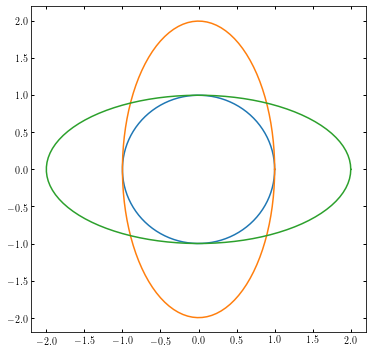

In [13]:
figure(figsize=(6,6))
x_el1,y_el1 = ellipe_2d_plot([0,0], [1,1])
x_el2,y_el2 = ellipe_2d_plot([0,0], [1,2])
x_el3,y_el3 = ellipe_2d_plot([0,0], [2,1])

plot(x_el1, y_el1)
plot(x_el2, y_el2)
plot(x_el3, y_el3)

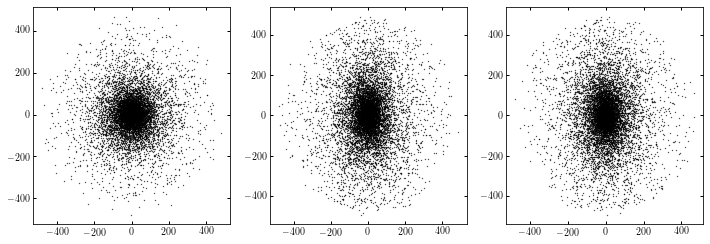

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(pos_tr_pr[:10000,0], pos_tr_pr[:10000,1], s=0.1, c='k')
plt.subplot(1, 3, 2)
plt.scatter(pos_tr_pr[:10000,0], pos_tr_pr[:10000,2], s=0.1, c='k')
plt.subplot(1, 3, 3)
plt.scatter(pos_tr_pr[:10000,1], pos_tr_pr[:10000,2], s=0.1, c='k')


In [15]:
I_pr = jellyfish.shapes.shape_tensor(pos_tr_pr)

In [16]:
eig(I_pr)

(array([3.74677228e+09, 3.78699356e+09, 7.37776507e+09]),
 array([[-0.72472955, -0.68901781,  0.00464064],
        [-0.68903006,  0.72473064, -0.00175195],
        [ 0.00215609,  0.00446723,  0.9999877 ]]))

In [17]:
shape_pr = jellyfish.shapes.axis_ratios(pos_tr_pr)

In [167]:
shape_pr

(array([[-0.72472955, -0.68901781,  0.00464064],
        [-0.68903006,  0.72473064, -0.00175195],
        [ 0.00215609,  0.00446723,  0.9999877 ]]),
 array([3.74677228e+09+0.j, 3.78699356e+09+0.j, 7.37776507e+09+0.j]))

In [19]:
def ellipsoids_plot(eigvec, eigval, Npoints):
    axis = (5*eigval.real/Npoints)**0.5
    print(axis)
    x_el1,y_el1 = ellipe_2d_plot([0,0], [axis[0],axis[1]])
    x_el2,z_el2 = ellipe_2d_plot([0,0], [axis[0],axis[2]])
    y_el3,z_el3 = ellipe_2d_plot([0,0], [axis[1],axis[2]])
    rot_matrix = eigvec
    x_el1_rot, y_el1_rot, z = dot(rot_matrix, [x_el1, y_el1, np.zeros(100)])
    x_el2_rot, y_el2_rot, z_el2_rot = dot(rot_matrix, [x_el2, np.zeros(100), z_el2])
    x_el3_rot, y_el3_rot, z_el3_rot = dot(rot_matrix, [np.zeros(100), y_el3,  z_el3])
    
    return [x_el1, y_el1, x_el2, z_el2, y_el3, z_el3], [x_el1_rot, y_el1_rot, x_el2_rot, z_el2_rot, y_el3_rot, z_el3_rot] 
    

In [20]:
elli_or, elli_rot = ellipsoids_plot(shape_pr[0], shape_pr[1], len(pos_tr_pr))

[222.11618191 223.30519855 311.68360717]


(-400, 400)

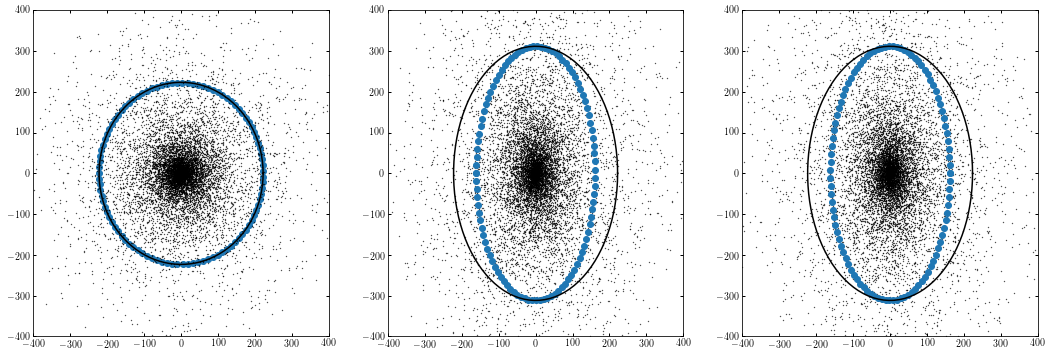

In [21]:
figure(figsize=(18,6))
subplot(1, 3, 1)
plot(elli_or[0], elli_or[1], c='k')
scatter(elli_rot[0], elli_rot[1])
plt.scatter(pos_tr_pr[:10000,0], pos_tr_pr[:10000,1], s=0.1, c='k')

xlim(-400, 400)
ylim(-400, 400)

subplot(1, 3, 2)
plot(elli_or[2], elli_or[3], c='k')
plt.scatter(pos_tr_pr[:10000,0], pos_tr_pr[:10000,2], s=0.1, c='k')
scatter(elli_rot[2], elli_rot[3])
xlim(-400, 400)
ylim(-400, 400)

subplot(1, 3, 3)
plot(elli_or[4], elli_or[5], c='k')
plt.scatter(pos_tr_pr[:10000,1], pos_tr_pr[:10000,2], s=0.1, c='k')
scatter(elli_rot[4], elli_rot[5])

xlim(-400, 400)
ylim(-400, 400)

# Test - Rotating the halo

The eigenvaalues of the Shape tensor are proportional to the length of the principal axes. 
The eigenvectors give the directions of those axis.

I compute the eigenvectors
and then the euler angle from the original basis defined as

$\hat{x}=(\hat{i}, 0, 0)$,

$\hat{y}=(0, \hat{j}, 0)$,

$\hat{z}=(0, 0, \hat{k})$


Then I rotate an ellisoid to the principal basis to plot the ellipsoid


The principal new axes are: $\hat{x'}, \hat{y'}, \hat{z'}$

And since ${V'} = R V$ and $V=I$ then the rotation matrix $R$ is the eigevectors matrix

In [22]:
def y_rotation(vector,theta):
    """Rotates 3-D vector around y-axis"""
    R = np.array([[np.cos(theta),0,np.sin(theta)],[0,1,0],[-np.sin(theta), 0, np.cos(theta)]])
    return np.dot(R,vector)


def x_rotation(vector,theta):
    """Rotates 3-D vector around x-axis"""
    R = np.array([[0, np.cos(theta),np.sin(theta)],[1,0,0],[0, -np.sin(theta), np.cos(theta)]])
    return np.dot(R,vector)

def z_rotation(vector,theta):
    """Rotates 3-D vector around z-axis"""
    R = np.array([[np.cos(theta),np.sin(theta), 0],[0,0,1],[0, -np.sin(theta), np.cos(theta)]])
    return np.dot(R,vector)


In [23]:
pos_rot = np.zeros((len(pos_tr_pr), 3))
for i in range(len(pos_tr_pr)):
    pos_rot[i] = y_rotation(pos_tr_pr[i], np.pi/4.)

Text(0,0.5,'$z$')

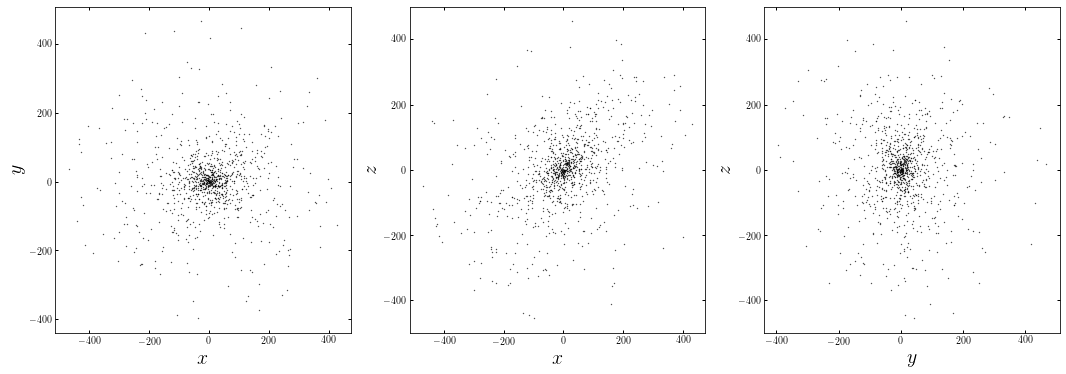

In [24]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(pos_rot[:1000,0], pos_rot[:1000,1], s=0.1, c='k')
xlabel('$x$', fontsize=20)
ylabel('$y$', fontsize=20)
plt.subplot(1, 3, 2)
plt.scatter(pos_rot[:1000,0], pos_rot[:1000,2], s=0.1, c='k')
xlabel('$x$', fontsize=20)
ylabel('$z$', fontsize=20)
plt.subplot(1, 3, 3)
plt.scatter(pos_rot[:1000,1], pos_rot[:1000,2], s=0.1, c='k')
xlabel('$y$', fontsize=20)
ylabel('$z$', fontsize=20)

In [25]:
np.savetxt('rot_halo_1000.txt', pos_rot[:10000])

In [26]:
shape_pr_rot = jellyfish.shapes.axis_ratios(pos_rot)

In [27]:
shape_pr_rot

(array([[-0.71037951,  0.5109366 , -0.48405035],
        [ 0.00175195,  0.68903005,  0.72473065],
        [-0.70381665, -0.51398577,  0.49036797]]),
 array([7.37776507e+09+0.j, 3.74677228e+09+0.j, 3.78699356e+09+0.j]))

In [28]:
shape_pr_rot[0][:,0]

array([-0.71037951,  0.00175195, -0.70381665])

In [33]:
axis = np.identity(3)
print(axis)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [34]:
np.dot(axis[0], shape_pr_rot[0].T)

array([-0.71037951,  0.00175195, -0.70381665])

In [35]:
pos_unrot = np.dot(shape_pr_rot[0].T, pos_rot.T).T

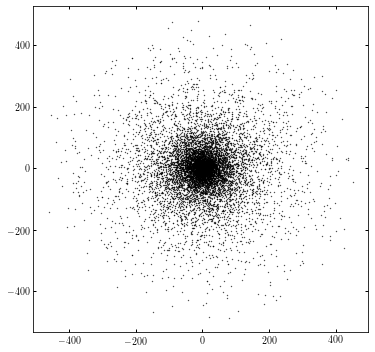

In [36]:
figsize(6,6)
scatter(pos_unrot[:10000,2], pos_unrot[:10000, 1], c='k', s=0.1)

In [37]:
def angle_rowwise(A, B):
    #  from : https://stackoverflow.com/questions/50772176/calculate-the-angle-between-the-rows-of-two-matrices-in-numpy
    p1 = np.einsum('ij,ij->i',A,B)
    p2 = np.linalg.norm(A,axis=1)
    p3 = np.linalg.norm(B,axis=1)
    p4 = p1 / (p2*p3)
    return np.arccos(np.clip(p4,-1.0,1.0))

In [38]:
shape_pr_rot[1]

array([7.37776507e+09+0.j, 3.74677228e+09+0.j, 3.78699356e+09+0.j])

In [39]:
out1 = angle_rowwise(shape_pr_rot[0].T, axis)*180/np.pi

In [40]:
out2 = angle_rowwise(shape_pr_rot[0], axis)*180/np.pi

In [41]:
out1

array([135.2658018 ,  46.44662176,  60.63523011])

In [42]:
out2

array([135.2658018 ,  46.44662176,  60.63523011])

In [61]:
shape_pr_rot[0]

array([[-0.71037951,  0.5109366 , -0.48405035],
       [ 0.00175195,  0.68903005,  0.72473065],
       [-0.70381665, -0.51398577,  0.49036797]])

In [77]:
xp_i = shape_pr_rot[0][0,0]
yp_i = shape_pr_rot[0][0,1]
zp_i = shape_pr_rot[0][0,2]

xp_j = shape_pr_rot[0][1,0]
yp_j = shape_pr_rot[0][1,1]
zp_j = shape_pr_rot[0][1,2]

xp_k = shape_pr_rot[0][2,0]
yp_k = shape_pr_rot[0][2,1]
zp_k = shape_pr_rot[0][2,2]

alpha = np.arccos(-zp_i/(np.sqrt(1-xp_i**2)))
beta = np.arccos(xp_i)
gamma = np.arccos(xp_k/(np.sqrt(1-xp_i**2)))
print(alpha, beta, gamma)
print(alpha*180/np.pi, beta*180/np.pi, gamma*180/np.pi)

0.8124132994818427 2.360833606723542 3.139103447995575
46.54785328060738 135.265801797907 179.85737902511093


In [111]:
def rotation_matrix_ea(alpha, beta, gamma):
    """
    X_1Z_2X_3 rotation for the euler angles
    """
    c1 = np.cos(alpha)
    c2 = np.cos(beta)
    c3 = np.cos(gamma)
    s1 = np.sin(alpha)
    s2 = np.sin(beta)
    s3 = np.sin(gamma)
    
    
    col1 = np.array([c2, s1*s2, -c1*s2])
    col2 = np.array([s3*s2, -c1*c3 - c2*s1*s3, -c3*s1 - c1*c2*s3])
    col3 = np.array([c3*s2, -c1*s3 - c2*c3*s1, c1*c2*c3-s1*s3])
    
    return np.array([col1, col2, col3])

    
    

In [112]:
RM_euler = rotation_matrix_ea(alpha, beta, gamma)
RM_euler

array([[-0.71037951,  0.5109366 , -0.48405035],
       [ 0.00175195,  0.68903005,  0.72716291],
       [-0.70381665, -0.51740966,  0.4867539 ]])

In [188]:
RM_euler[0]

array([ 0.49036797, -0.72473065,  0.48405035])

In [163]:
norm(RM_euler[:,2])

1.0

In [251]:
np.matmul(RM_euler.T, axis)

array([[ 0.49036797,  0.51398577,  0.70381665],
       [-0.72473065, -0.20804721,  0.65687278],
       [ 0.48405035, -0.83218687,  0.27048156]])

In [249]:
np.matmul(RM_euler, axis)

array([[ 0.49036797, -0.72473065,  0.48405035],
       [ 0.51398577, -0.20804721, -0.83218687],
       [ 0.70381665,  0.65687278,  0.27048156]])

In [113]:
np.matmul(shape_pr_rot[0], axis)

array([[-0.71037951,  0.5109366 , -0.48405035],
       [ 0.00175195,  0.68903005,  0.72473065],
       [-0.70381665, -0.51398577,  0.49036797]])

In [114]:
from matplotlib.pyplot import arrow

(-400, 400)

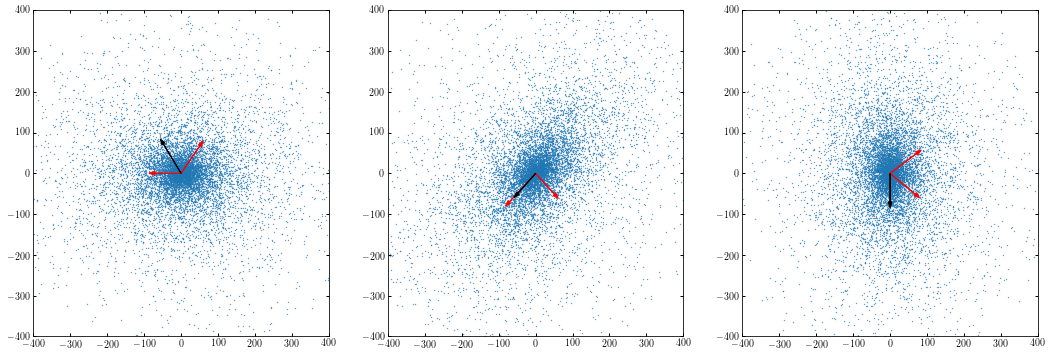

In [123]:
plt.figure(figsize=(18, 6))
plt.title('Eigen vectors (red) vs rotation euler (blue))')
plt.subplot(1, 3, 1)
#arrow(0, 0, 49, 51, head_width=10)
#arrow(0, 0, -72, -20, head_width=10)

plt.scatter(pos_rot[:10000,0], pos_rot[:10000,1], s=0.1, c='C0')

arrow(0, 0, -71, 0.1, head_width=10, color='r')
arrow(0, 0, 51, 68, head_width=10, color='r')
arrow(0, 0, -48, 72, head_width=10, color='k')


xlim(-400, 400)
ylim(-400, 400)

subplot(1, 3, 2)
#arrow(0, 0, 49, 70, head_width=10)
#arrow(0, 0, -72, 65, head_width=10)

plt.scatter(pos_rot[:10000,0], pos_rot[:10000,2], s=0.1, c='C0')

arrow(0, 0, -71, -70, head_width=10, color='r')
arrow(0, 0, 51, -51, head_width=10, color='r')
arrow(0, 0, -48, -49, head_width=10, color='k')


xlim(-400, 400)
ylim(-400, 400)

subplot(1, 3, 3)
#arrow(0, 0, -20, 65, head_width=10)
#arrow(0, 0, -83, 27, head_width=10)
plt.scatter(pos_rot[:10000,1], pos_rot[:10000,2], s=0.1, c='C0')

arrow(0, 0, 68, -51, head_width=10, color='r')
arrow(0, 0, 72, 49, head_width=10, color='r')
arrow(0, 0, 0, -70, head_width=10, color='k')

xlim(-400, 400)
ylim(-400, 400)

## Draw Ellipses
x -> major axis

y -> minor axis

z -> intermediate axis

In [126]:
shape_pr_rot[1]

array([7.37776507e+09+0.j, 3.74677228e+09+0.j, 3.78699356e+09+0.j])

In [135]:
x_el1,y_el1 = ellipe_2d_plot([0,0], [73,37.4])
x_el2,z_el2 = ellipe_2d_plot([0,0], [73,37.8])
y_el3,z_el3 = ellipe_2d_plot([0,0], [37.4,37.8])
a = np.zeros(len(x_el1))

In [139]:
rot1 = np.matmul(np.array([x_el1, y_el1, np.zeros(len(a))]).T, shape_pr_rot[0])

In [172]:
rot3 = np.matmul(np.array([y_el3, z_el3, np.zeros(len(a))]).T, shape_pr_rot[0])

(-100, 100)

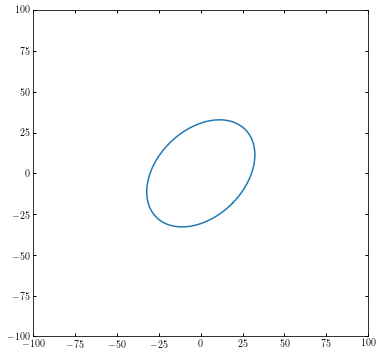

In [178]:
#plot(x_el1, y_el1)
plot(rot3[:,1], rot3[:,2])

xlim(-100, 100)
ylim(-100, 100)

(-100, 100)

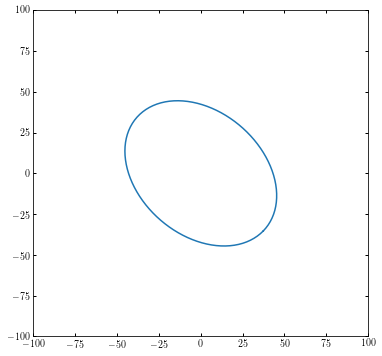

In [146]:
plot(rot1[:,1], rot1[:,2])
xlim(-100, 100)
ylim(-100, 100)